In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_12952/1042931510.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


False
False
False
False
False
False
False


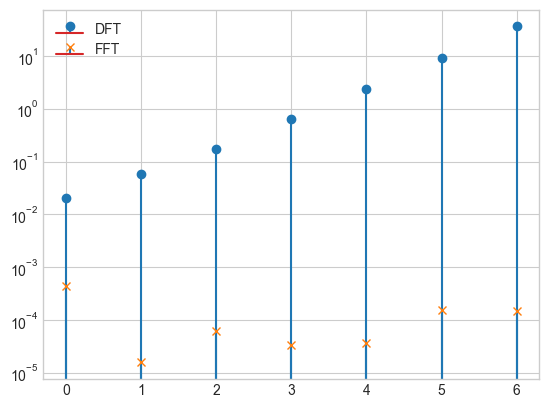

In [15]:
matrix_size = [128, 256, 512, 1024, 2048, 4096, 8192]

def initFourier(N: int) -> np.array:
    F: np.array = np.empty((N, N), dtype='complex128')
    for i in range(N):
        for k in range(N):
            F[i][k] = np.exp(2 * np.pi * i * 1j * k / N)

    return F
#
index = [0, 1, 2, 3, 4, 5, 6]
time_vector_0 = []
time_vector_1 = []

for n in matrix_size:
    t = np.linspace(0, 1, n)
    sin = np.sin(2*np.pi * t)
    t0 = time.time()
    ret1 = np.matmul(initFourier(n), sin)
    t0_fin = time.time() - t0
    time_vector_0.append(t0_fin)

    t0 = time.time()
    ret2 = np.fft.fft(sin)
    t1_fin = time.time() - t0
    time_vector_1.append(t1_fin)
    print(np.linalg.norm(np.abs(ret1 - ret2)) < 0.0001)



plt.yscale('log')
plt.stem(index, time_vector_0, label='DFT')
plt.stem(index, time_vector_1, label='FFT', markerfmt='C1x')
plt.legend()

plt.show()

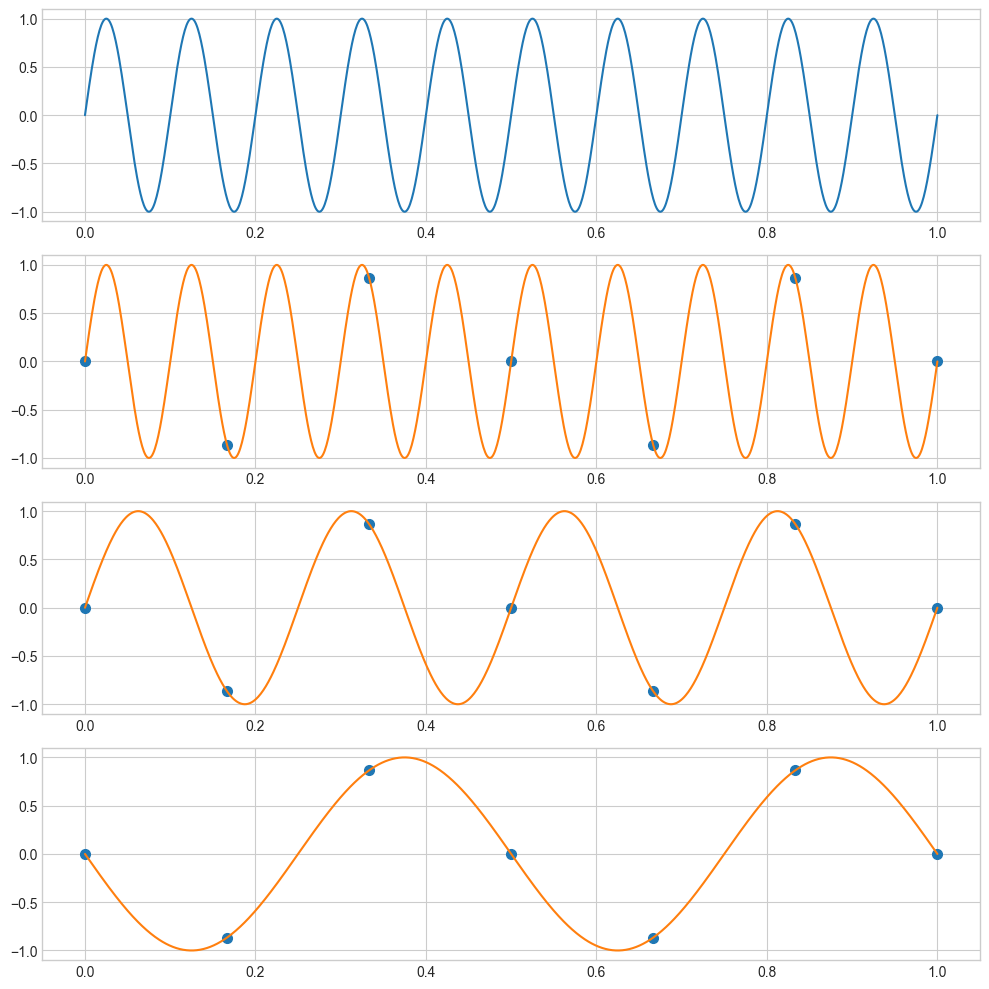

In [73]:
#2

f0 = 10

f = f0
A = 1
phi = 0

fs = 7

t = np.linspace(0, 1, 1000)

ts = np.linspace(0, 1, fs)

samples = A * np.sin(2 * np.pi * f * ts + phi)

sin1 = A * np.sin(2 * np.pi * f * t + phi)

f = f0 -1 * (fs - 1)
sin2 = A * np.sin(2 * np.pi * f * t + phi)

f = f0 -2 * (fs - 1)
sin3 = A * np.sin(2 * np.pi * f * t + phi)

l = [sin1, sin2, sin3]

fig, axs = plt.subplots(4, figsize=(10, 10))

for i, ax in enumerate(axs):
    if i == 0:
        ax.plot(t, sin1)
        continue
    ax.plot(ts, samples, marker='o', linestyle='None', markersize=7)
    ax.plot(t, l[i-1])

plt.tight_layout()
plt.show()

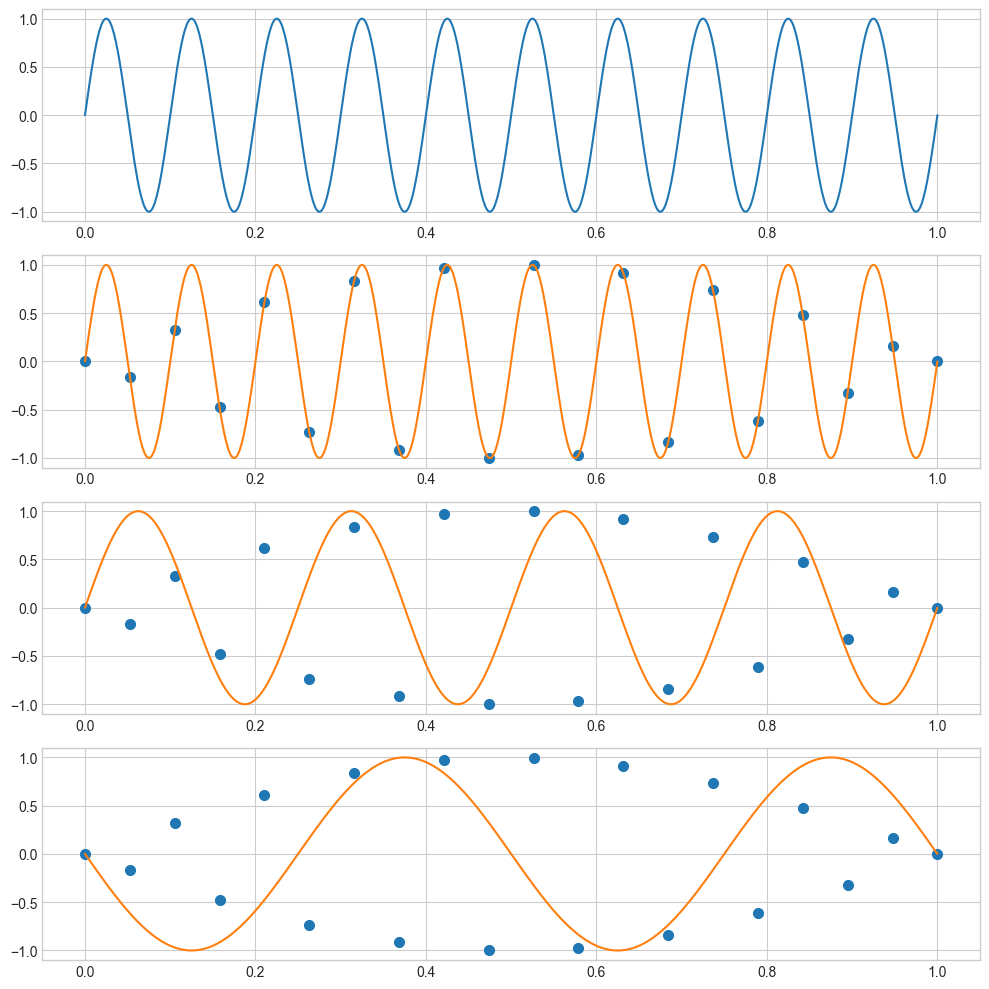

In [88]:
#3

#2

f0 = 10

f = f0
A = 1
phi = 0

fs = 7

t = np.linspace(0, 1, 1000)

sin1 = A * np.sin(2 * np.pi * f * t + phi)

f = f0 -1 * (fs - 1)
sin2 = A * np.sin(2 * np.pi * f * t + phi)

f = f0 -2 * (fs - 1)
sin3 = A * np.sin(2 * np.pi * f * t + phi)

l = [sin1, sin2, sin3]

fig, axs = plt.subplots(4, figsize=(10, 10))


new_fs = 20

ts = np.linspace(0, 1, new_fs)
samples = A * np.sin(2 * np.pi * f0 * ts + phi)

for i, ax in enumerate(axs):
    if i == 0:
        ax.plot(t, sin1)
        continue
    ax.plot(ts, samples, marker='o', linestyle='None', markersize=7)
    ax.plot(t, l[i-1])

plt.tight_layout()
plt.show()

$$

\text{\textbf{Ex. 4}}   \\

\text{A contrabass has frequencies between 40Hz and 200Hz.} \\

\text{To minimum sampling frequency needs to be twice as big as the maximum frequency} \\
\[ fs \ge 2 * 200 = 400  \]
$$

In [11]:
#5
!sox ./assets/aeiou.wav -n spectrogram -o ./assets/aeiou_spectogram.png

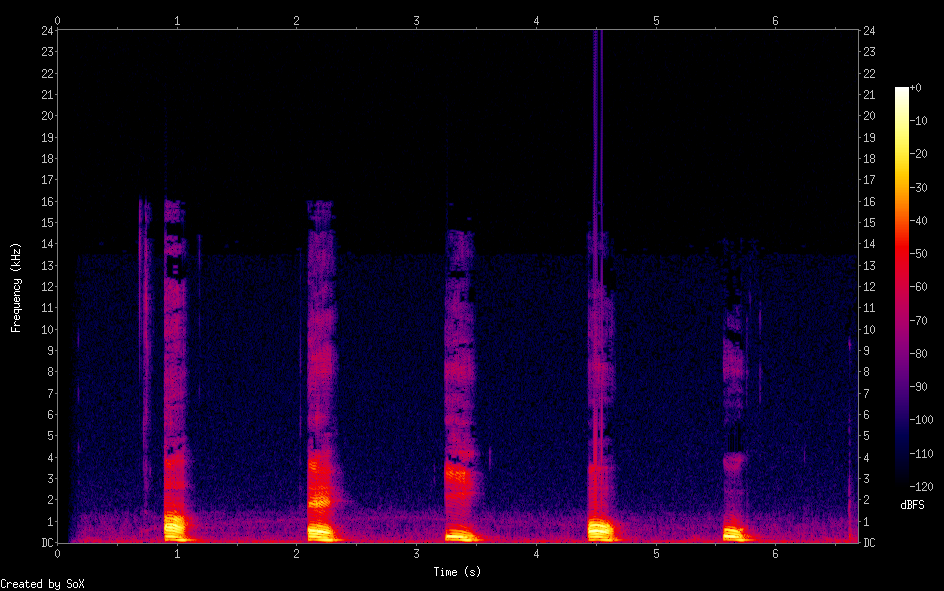

In [10]:

from IPython.display import Image

'''
Vocalele par f greu de distins intre ele.
'''
Image(filename='./assets/aeiou_spectogram.png')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_12952/979765897.py:48: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(matrix), aspect='auto', cmap='viridis')
/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_12952/979765897.py:48: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(matrix), aspect='auto', cmap='viridis')


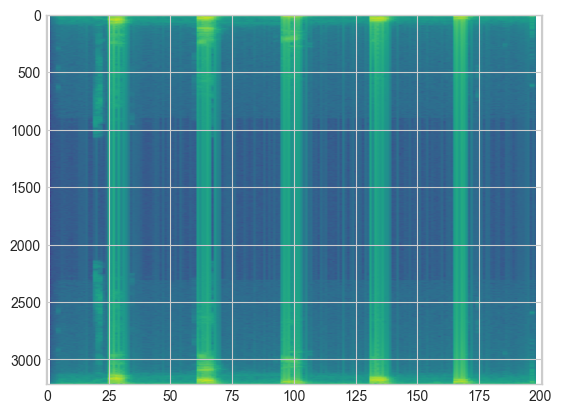

In [3]:
#6
import scipy.io.wavfile as wav
import numpy as np

samplerate, data = wav.read('./assets/aeiou.wav')

data = np.array(data)

N: int = len(data)

group_size = int(0.01 * N)
overlap = group_size // 2

grouped_signal = []
for i in range(0, N, overlap):
    grouped_signal.append(data[i: i + group_size])

X = []

# omitting last array which may be truncated
for i, x in enumerate(grouped_signal):
    X.append(np.abs(np.fft.fft(x)))

X.pop()
X.pop()
# putting last array and filling in the gaps
j = 0
temp = list(grouped_signal[len(grouped_signal) - 1])
for _ in range(len(temp), len(grouped_signal[0])):
    temp.append(temp[j])
    j += 1

X.append(temp)

j = 0
temp = list(grouped_signal[len(grouped_signal) - 2])
for _ in range(len(temp), len(grouped_signal[0])):
    temp.append(temp[j])
    j += 1


X.append(temp)


X = np.array(X)

matrix = X.T
plt.imshow(np.log10(matrix), aspect='auto', cmap='viridis')
plt.show()

$$
\textbf{Ex. 7}\\
$$

$$
\begin{align*}
P_{\text{signal}} &= 90 \, \text{dB} \\
\text{SNR}_{\text{dB}} &= 80 \, \text{dB} \\
\text{---------------/------} \\
P_{\text{noise}} = ? \\
\text{--------------//------} \\
\text{SNR}_{\text{dB}} &= 10 \cdot \log_{10}\left(\frac{P_{\text{signal}}}{P_{\text{noise}}}\right) \\
\Rightarrow \text{SNR}_{\text{dB}} &= 10 \cdot \log_{10}(P_{\text{signal}}) - 10 \cdot \log_{10}(P_{\text{noise}}) \\
\Rightarrow 10 \cdot \log_{10}(P_{\text{noise}}) &= 10 \cdot \log_{10}(P_{\text{signal}}) - \text{SNR}_{\text{dB}} \\
\div 10 & \Rightarrow \log_{10}(P_{\text{noise}}) = \log_{10}(P_{\text{signal}}) - \left(\frac{\text{SNR}_{\text{dB}}}{10}\right) \\
\Rightarrow 10^{\log_{10}(P_{\text{noise}})} &= 10^{\log_{10}(P_{\text{signal}}) - \left(\frac{\text{SNR}_{\text{dB}}}{10}\right)} \\
\Rightarrow P_{\text{noise}} &= \frac{P_{\text{signal}}}{10^{\left(\frac{\text{SNR}_{\text{dB}}}{10}\right)}} \\
\Rightarrow P_{\text{noise}} &= \frac{90 \, \text{dB}}{10^{(80 \, \text{dB}/10)}} \\
\Rightarrow P_{\text{noise}} &= \frac{90 \, \text{dB}}{10^8} \\
\Rightarrow P_{\text{noise}} &= \frac{9 \times 10}{10^8} \\
\Rightarrow P_{\text{noise}} &= 9 \times 10^{-7}
\end{align*}
$$
